## About this attempt

Not just with the default parameter settings of AnomalyTwinImageList, tried with DefectOnBlobImageList which would be more effective.

Resulted in much better performance.

In [1]:
import sys; sys.path.append('..')
from mvtecad_test import *
from fastai.callbacks import SaveModelCallback
fastai_progress_as_text()

PATH = Path('/mnt/dataset/mvtec_ad')

mvtecad = MVTecADTest(PATH, artificial_image_list_cls=DefectOnBlobImageList,
                      skip_data_creation=True)
DefectOnBlobImageList.set_params(blob_th=20, width_min=1, width_max=10, length=20, color=False)

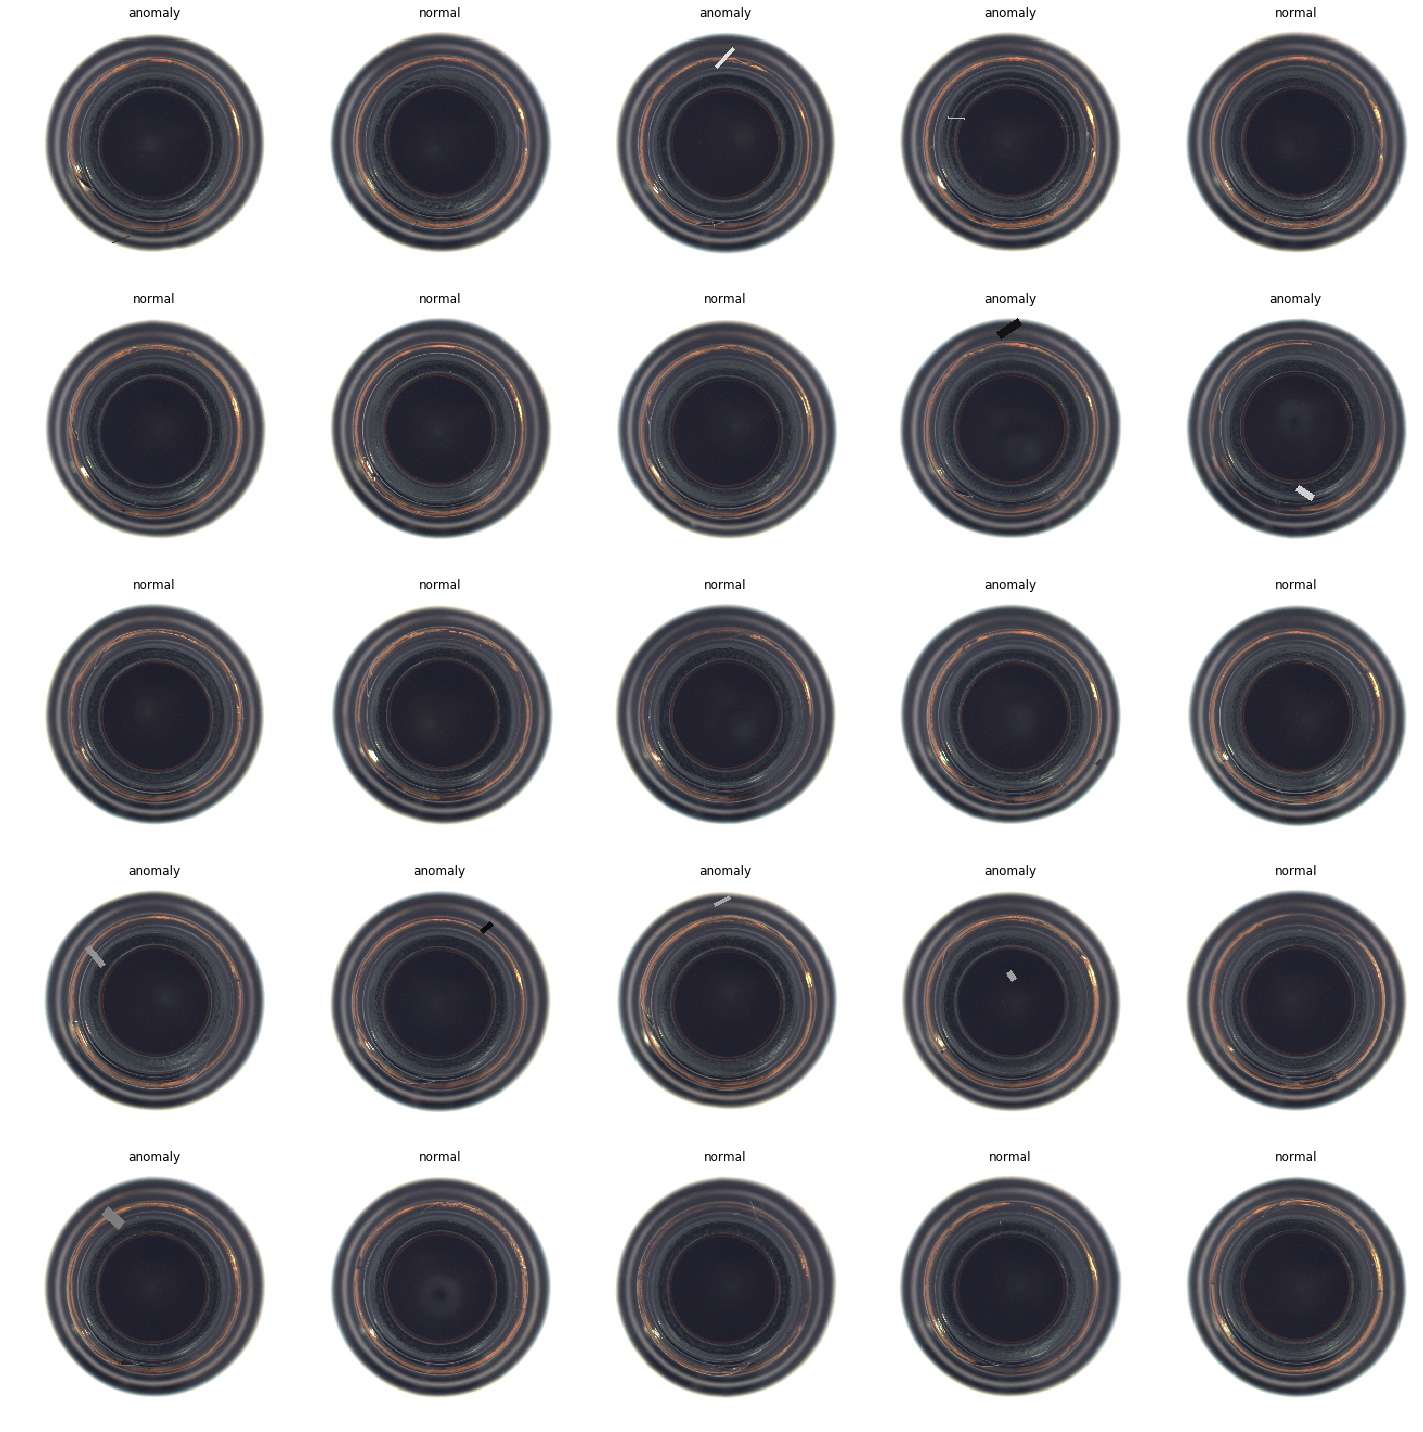

In [2]:
mvtecad.set_test(0, 0)
mvtecad.databunch().show_batch()

In [ ]:
def learner_conventional(train_data):
    learn = cnn_learner(train_data, models.resnet18, metrics=accuracy).mixup()
    learn.fit_one_cycle(10)
    learn.unfreeze()
    learn.fit_one_cycle(10)
    learn.fit_one_cycle(10)
    learn.fit_one_cycle(10, callbacks=[SaveModelCallback(learn)])
    return learn

def learner_L2ConstrainedNet(train_data):
    learn = cnn_learner(train_data, models.resnet18, metrics=accuracy).mixup()
    learn.model = L2ConstrainedNet(learn.model)
    learn.fit_one_cycle(10)
    learn.unfreeze()
    learn.fit_one_cycle(10)
    learn.fit_one_cycle(10)
    learn.fit_one_cycle(10, callbacks=[SaveModelCallback(learn)])
    return learn

def learner_ArcFace(train_data):
    learn = cnn_learner(train_data, models.resnet18, metrics=accuracy)
    learn.model = XFaceNet(learn.model, train_data, ArcMarginProduct, m=0.5)
    learn.callback_fns.append(partial(LabelCatcher))
    learn.fit_one_cycle(10)
    learn.unfreeze()
    learn.fit_one_cycle(10)
    learn.fit_one_cycle(10)
    learn.fit_one_cycle(10, callbacks=[SaveModelCallback(learn)])
    return learn

def learner_CosFace(train_data):
    learn = cnn_learner(train_data, models.resnet18, metrics=accuracy)
    learn.model = XFaceNet(learn.model, train_data, AddMarginProduct, m=0.4)
    learn.callback_fns.append(partial(LabelCatcher))
    learn.fit_one_cycle(10)
    learn.unfreeze()
    learn.fit_one_cycle(10)
    learn.fit_one_cycle(10)
    learn.fit_one_cycle(10, callbacks=[SaveModelCallback(learn)])
    return learn

def learner_SphereFace(train_data):
    learn = cnn_learner(train_data, models.resnet18, metrics=accuracy)
    learn.model = XFaceNet(learn.model, train_data, SphereProduct, m=int(4))
    learn.callback_fns.append(partial(LabelCatcher))
    learn.fit_one_cycle(10)
    learn.unfreeze()
    learn.fit_one_cycle(10)
    learn.fit_one_cycle(10)
    learn.fit_one_cycle(10, callbacks=[SaveModelCallback(learn)])
    return learn

def learner_CenterLoss(train_data):
    learn = cnn_learner(train_data, models.resnet18, metrics=accuracy)
    learn.loss_func = WrapCenterLoss(learn, train_data, weight_cent=1/8)
    learn.fit_one_cycle(10)
    learn.unfreeze()
    learn.fit_one_cycle(10)
    learn.fit_one_cycle(10)
    learn.fit_one_cycle(10, callbacks=[SaveModelCallback(learn)])
    return learn

model_defs = {
    'Conventional': learner_conventional,
    'L2Constrained': learner_L2ConstrainedNet,
    'ArcFace': learner_ArcFace,
    'CosFace': learner_CosFace,
    'SphereFace': learner_SphereFace,
    'CenterLoss': learner_CenterLoss,
}
for name, learner_fn in model_defs.items():
    mvtecad.do_tests(name, learner_fn, visualize=[5, 9, 13])

# Stat: AUC


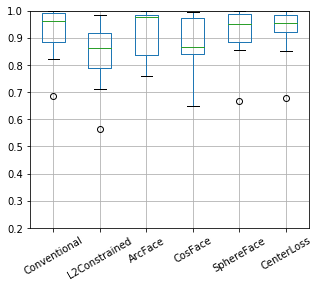

,Conventional,L2Constrained,ArcFace,CosFace,SphereFace,CenterLoss
bottle,0.992857,0.784524,0.980952,0.995238,0.990476,0.997619
cable,0.822901,0.808471,0.757684,0.845952,0.871627,0.931409
capsule,0.883127,0.712405,0.850818,0.840048,0.892302,0.851615
carpet,0.958266,0.901886,0.985152,0.648475,0.856742,0.945425
grid,0.963241,0.918964,0.98914,0.993317,0.99081,0.986633
hazelnut,0.9975,0.984286,0.983929,0.953571,0.9825,0.988214
leather,0.973166,0.946332,0.943954,0.954823,0.967731,0.973505
metal_nut,0.946237,0.927664,0.973607,0.97654,0.935973,0.961388
pill,0.888434,0.759138,0.830606,0.843972,0.897709,0.916803
screw,0.684567,0.564562,0.810822,0.745645,0.66612,0.676573


# Stat: Normalized distances


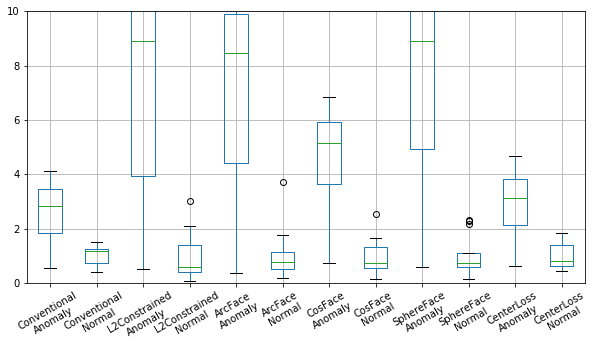

In [4]:
normalized_anomaly_distances, normalized_normal_distances, aucs = mvtecad.test_summary(dist_range=[0, 10])

In [6]:
paper_table2_compatible_result(mvtecad)

,Conventional,L2Constrained,ArcFace,CosFace,SphereFace,CenterLoss
index,,,,,,
carpet-TPR,0.865169,0.719101,0.932584,0.662921,0.707865,0.865169
carpet-TNR,0.964286,0.964286,1.000000,0.678571,0.928571,1.000000
grid-TPR,0.964912,0.982456,0.964912,0.964912,0.982456,0.982456
grid-TNR,0.952381,0.857143,1.000000,1.000000,1.000000,1.000000
leather-TPR,0.945652,0.945652,0.934783,0.869565,0.934783,0.945652
leather-TNR,0.968750,0.906250,0.937500,0.968750,0.968750,0.968750
tile-TPR,0.988095,0.666667,1.000000,0.833333,1.000000,0.809524
tile-TNR,0.878788,0.939394,0.878788,0.575758,1.000000,0.939394
wood-TPR,0.966667,0.883333,0.933333,0.933333,0.916667,0.983333


In [5]:
paper_table2_compatible_result(mvtecad, reorder=False)

,Conventional,L2Constrained,ArcFace,CosFace,SphereFace,CenterLoss
index,,,,,,
bottle-TPR,0.952381,0.920635,0.857143,0.984127,0.968254,0.968254
bottle-TNR,1.000000,0.750000,1.000000,1.000000,0.950000,1.000000
cable-TPR,0.641304,0.673913,0.945652,0.880435,0.782609,0.804348
cable-TNR,0.913793,0.931034,0.482759,0.706897,0.827586,0.931034
capsule-TPR,0.871560,0.541284,0.706422,0.761468,0.798165,0.688073
capsule-TNR,0.869565,0.956522,0.913043,0.826087,0.869565,0.869565
carpet-TPR,0.865169,0.719101,0.932584,0.662921,0.707865,0.865169
carpet-TNR,0.964286,0.964286,1.000000,0.678571,0.928571,1.000000
grid-TPR,0.964912,0.982456,0.964912,0.964912,0.982456,0.982456
